In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize'] = (80,50)
from sklearn.model_selection import GridSearchCV


In [12]:
data = load_iris()
X,y = data.data, data.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

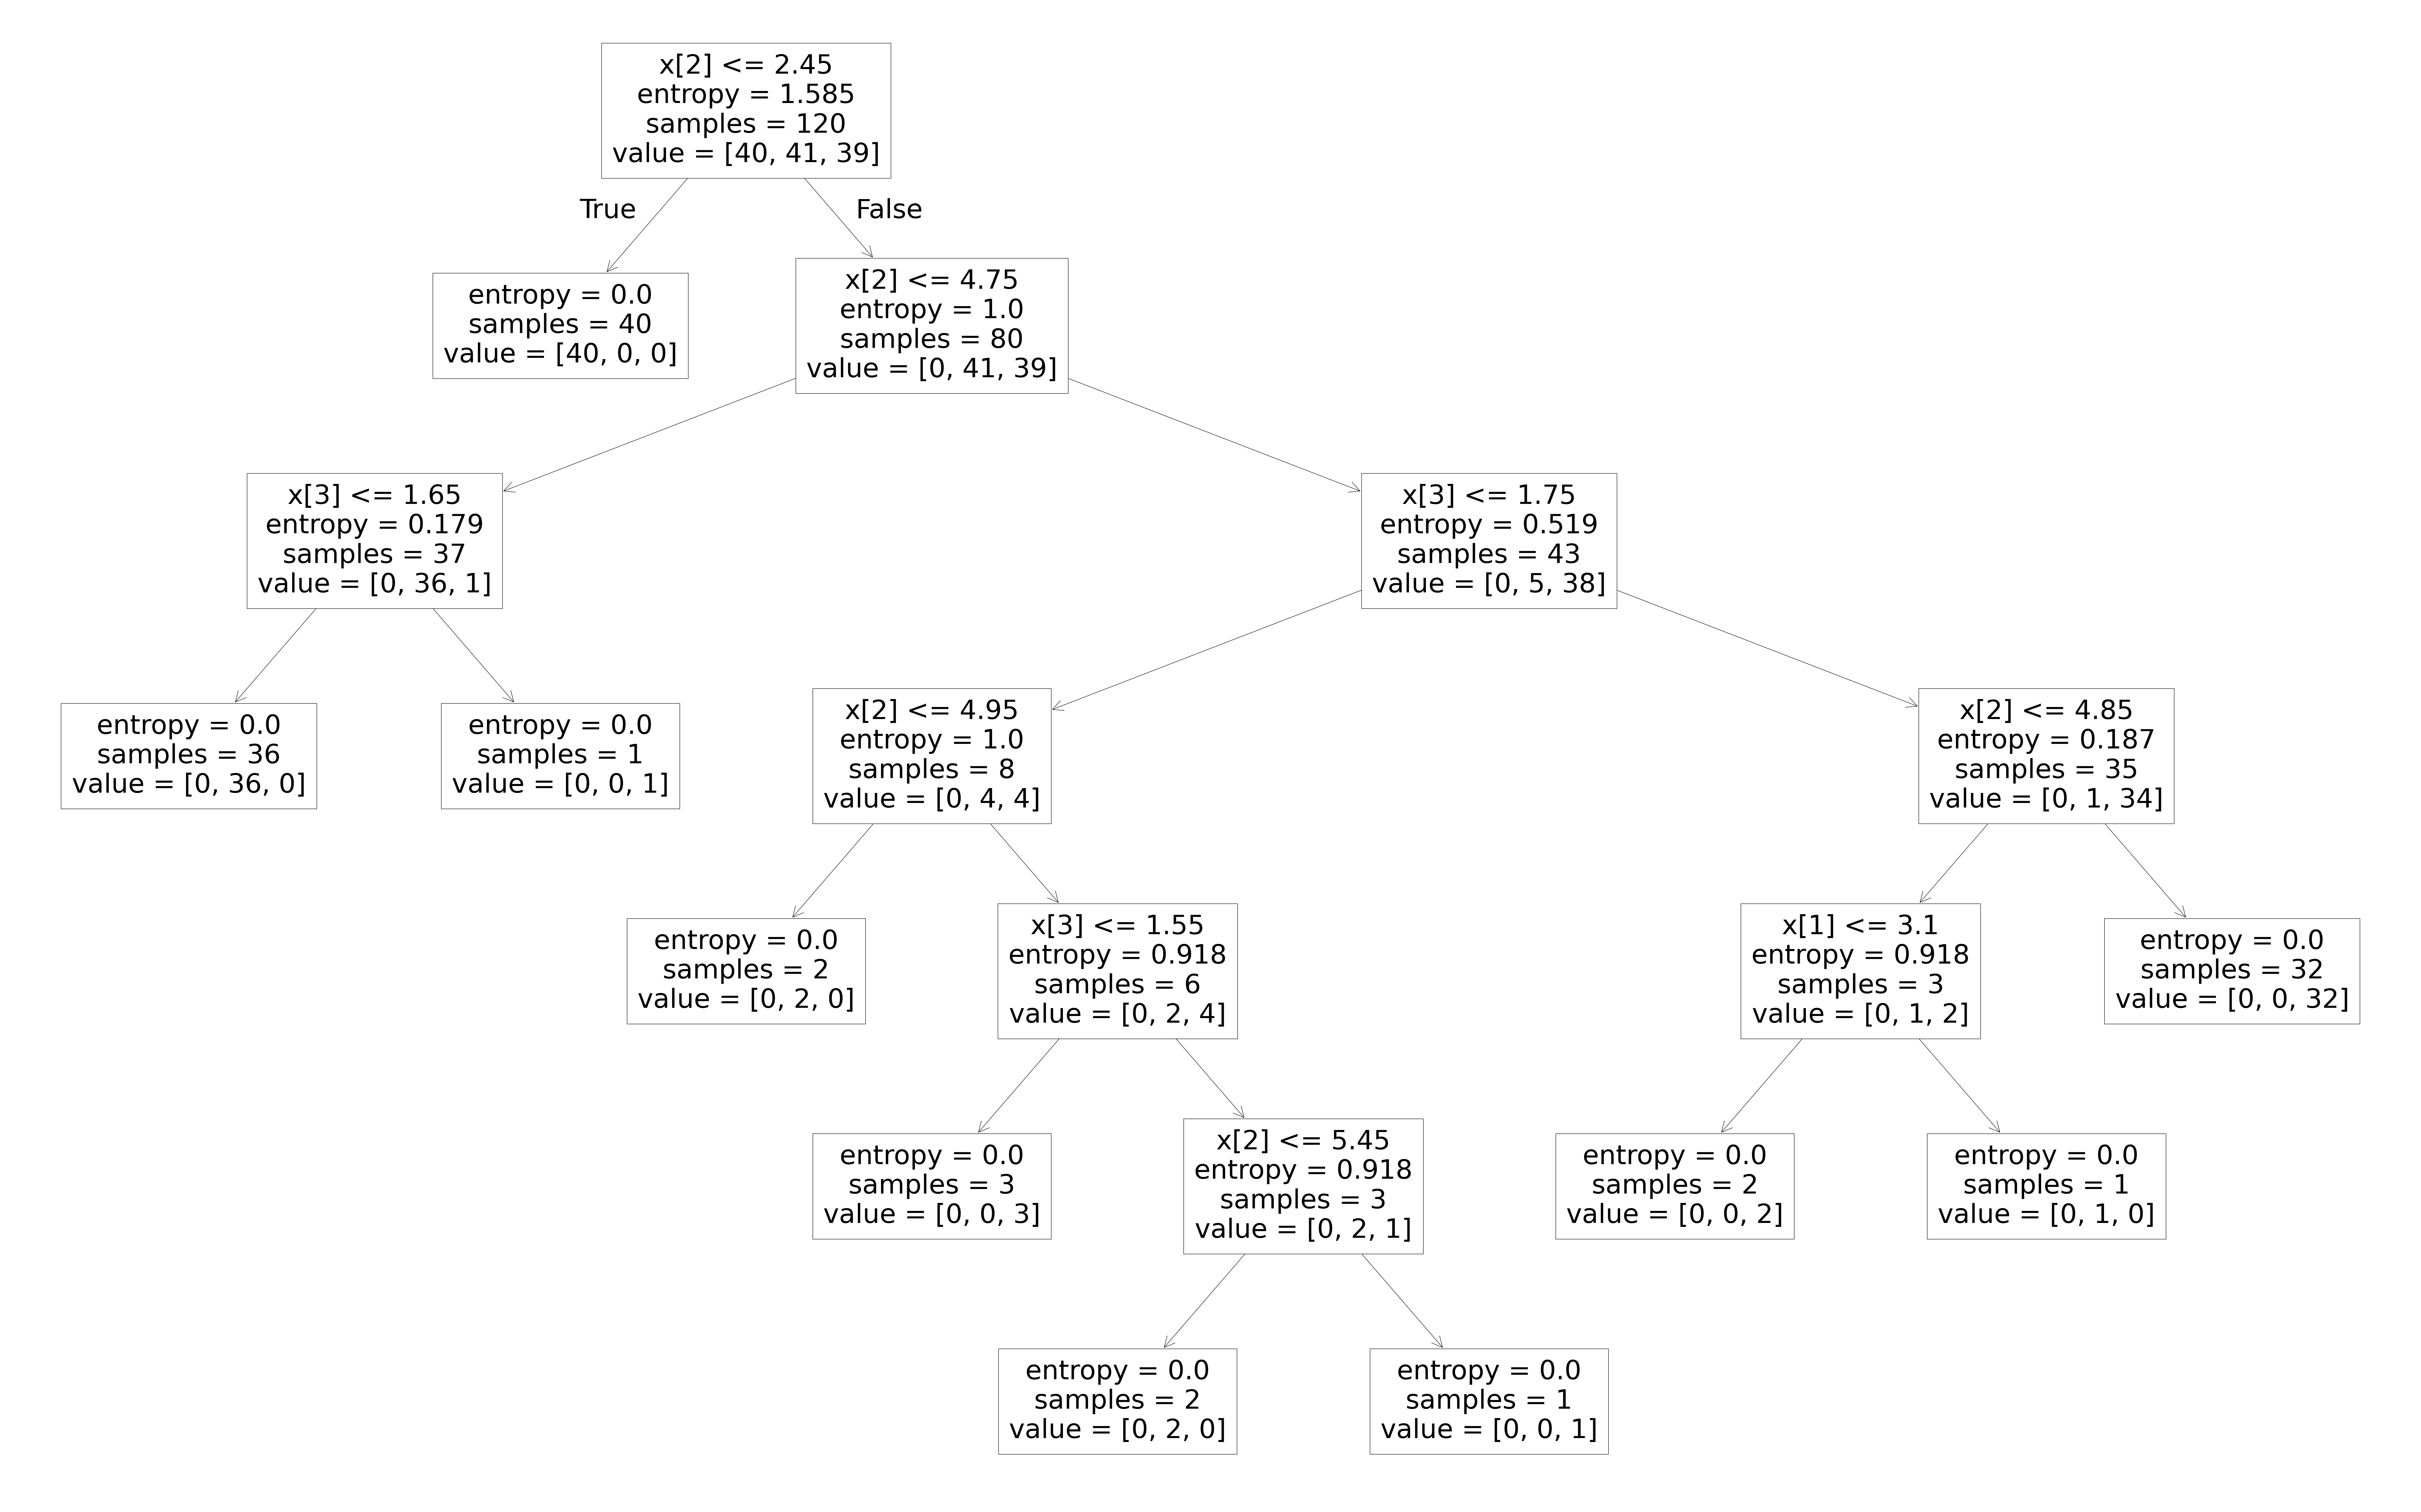

In [24]:
plot_tree(clf)
plt.tight_layout()
plt.show()

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/sakshi2k/Social_Network_Ads/refs/heads/master/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [35]:
df['Gender'] = df['Gender'].replace({'Male':0,'Female':1})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [51]:
X = df.iloc[:,1:4].values
y = df.iloc[:,-1].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8625

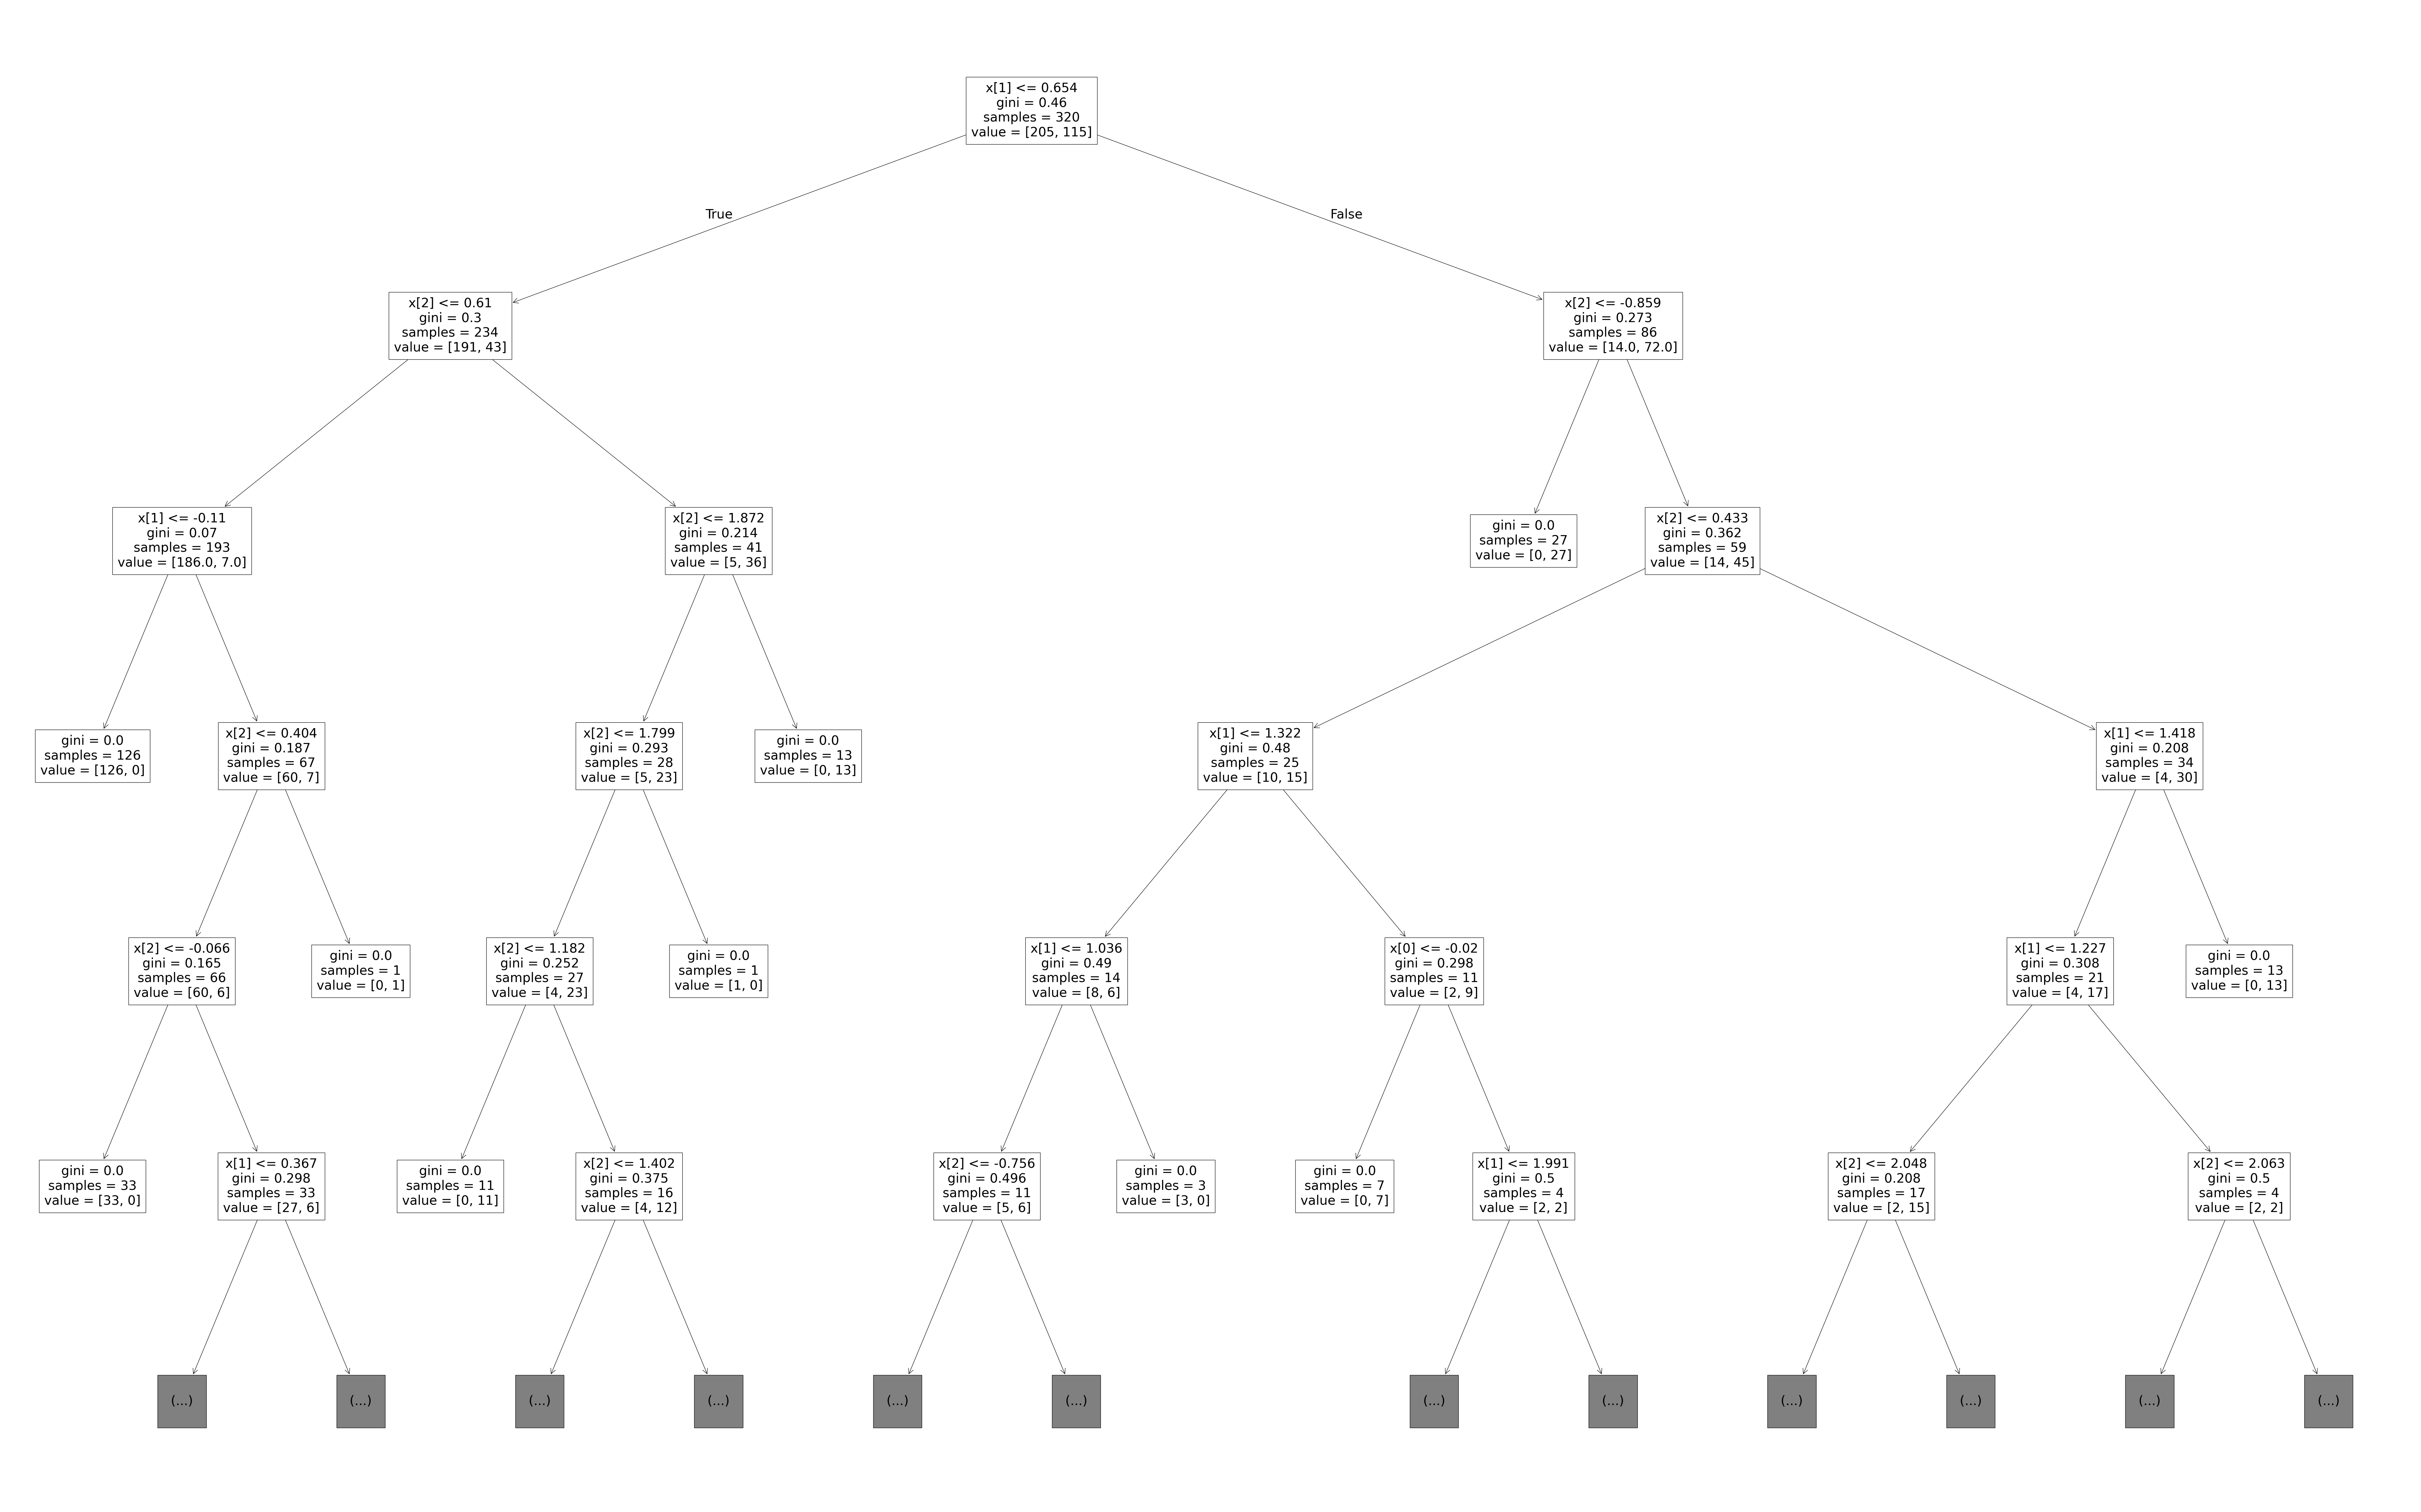

In [54]:
plot_tree(clf,max_depth=5)
plt.tight_layout()
plt.show()

##### Grid search CV

In [69]:
from sklearn.model_selection import GridSearchCV
param_dist = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,None]
}
grid = GridSearchCV(clf,param_grid=param_dist,cv=10,n_jobs=1)
grid.fit(X_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, ...]}"
,scoring,None
,n_jobs,1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [77]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

DecisionTreeClassifier(max_depth=2)
{'criterion': 'gini', 'max_depth': 2}
0.9125
